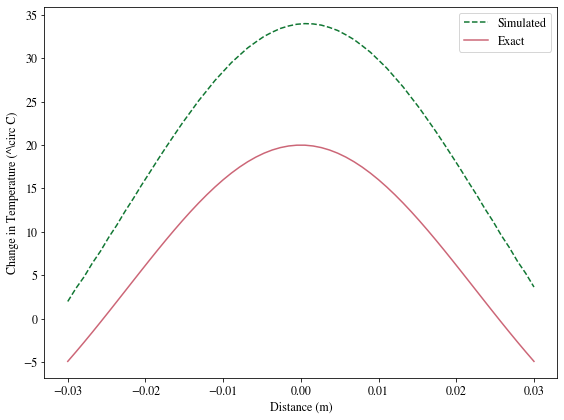

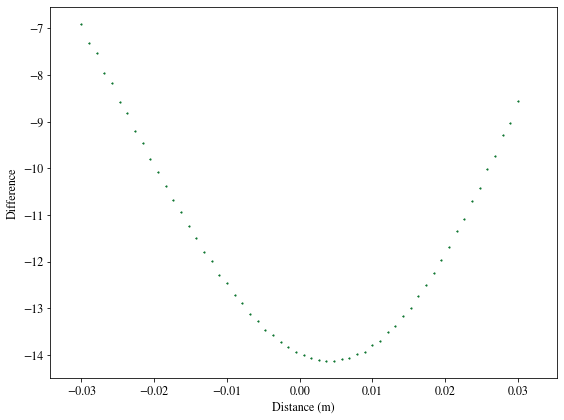

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tol_colors as tc
plt.rcParams.update({'font.size': 12})

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
# plt.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

color = tc.tol_cset("muted")
def goussen_point(k, sigma, Temp, x, t):
    r = np.sqrt(x**2)  # Compute distance matrix
    numerator = np.sqrt(np.pi * (2 * sigma)) * Temp
    denominator = np.sqrt(np.pi * (2 * sigma + 4 * t * k))
    exponent = -(r**2) / (2 * sigma + 4 * t * k)  # Ensure exponent has the same shape as r
    u = numerator / denominator * np.exp(exponent)
    return u


test = np.load("simulations/sim_temp_motion/line_prof.npy")

sigma =0.5e-3
T = 42
x = np.linspace(-0.03,0.03, 58)
t =0.000
k = 2.89906246e-02
Temp = goussen_point(k, sigma, T, x, t) -22
error = Temp - test


# First plot: Temperature vs. Test
plt.figure(figsize=(8, 6))
plt.plot(x, test,  c = color.green, label = "Simulated",  ls = '--')
plt.plot(x, Temp, c = color.rose, label = "Exact", ls='-')
plt.xlabel('Distance (m)')
plt.ylabel('Change in Temperature $(^\circ C)$')
# plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Gousen_static_GRE_2_42.pdf")
plt.show()
# Second plot: Temperature - Test

plt.figure(figsize=(8, 6))
plt.scatter(x, error, s=4,  c = color.green, label = "Simulated",  marker="4", linewidths=1)
plt.xlabel('Distance (m)')
plt.ylabel('Difference')
# plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Gousen_static_GRE_1_42.pdf")
plt.show()
# Show the plots


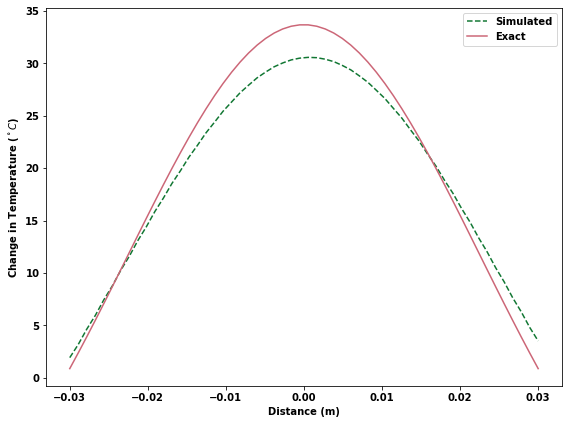

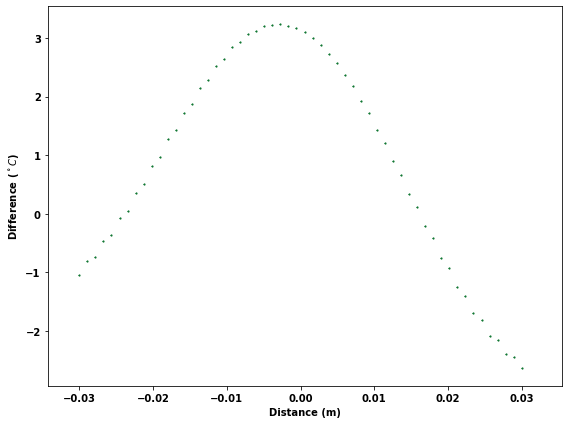

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tol_colors as tc
color = tc.tol_cset("muted")
def goussen_point(k, sigma, Temp, x, t):
    r = np.sqrt(x**2)  # Compute distance matrix
    numerator = np.sqrt(np.pi * (2 * sigma)) * Temp
    denominator = np.sqrt(np.pi * (2 * sigma + 4 * t * k))
    exponent = -(r**2) / (2 * sigma + 4 * t * k)  # Ensure exponent has the same shape as r
    u = numerator / denominator * np.exp(exponent)
    return u


test = np.load("simulations/sim_temp_motion/test_lin_prof.npy")

sigma =0.5e-3
T = 56
x = np.linspace(-0.03,0.03, 56)
t = 0.0001
k = 2.89906246e-02
Temp = goussen_point(k, sigma, T, x, t) -22
error = Temp - test


# First plot: Temperature vs. Test
plt.figure(figsize=(8, 6))
plt.plot(x, test,  c = color.green, label = "Simulated",  ls = '--')
plt.plot(x, Temp, c = color.rose, label = "Exact", ls='-')
plt.xlabel('Distance (m)')
plt.ylabel('Change in Temperature $(^\circ C)$')
# plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Gousen_static_SE_2.pdf")
plt.show()
# Second plot: Temperature - Test

plt.figure(figsize=(8, 6))
plt.scatter(x, error, s=4,  c = color.green, label = "Simulated",  marker="4", linewidths=1)
plt.xlabel('Distance (m)')
plt.ylabel('Difference $(^\circ C)$')
# plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/Gousen_static_SE_1.pdf")
plt.show()
# Show the plots

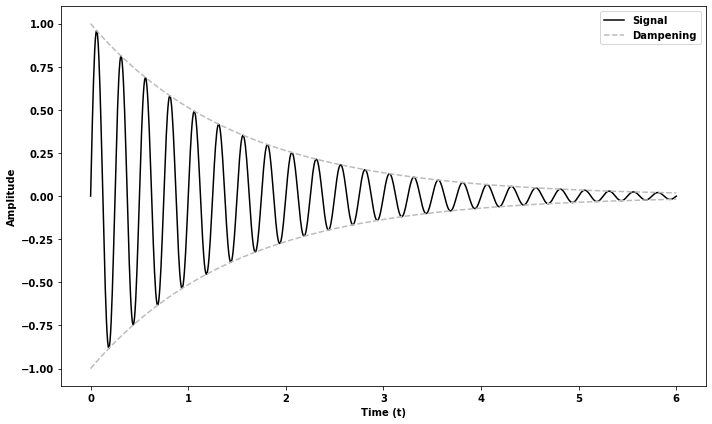

In [67]:
import numpy as np
import matplotlib.pyplot as plt
color = tc.tol_cset("vibrant")
# Parameters
omega = 8* np.pi  # Angular frequency
T2 =1.5  # Time constant
t = np.linspace(0, 6, 1000)  # Time array from 0 to 5 seconds with 1000 points

# Function definition
y = np.sin(omega * t) * np.exp(-t / T2)

decay = np.exp(-t / T2)



# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, y, c= "k", label = "Signal")
plt.plot(t, decay,  linestyle='--', c= color.grey, label = "Dampening" )
plt.plot(t, -1*decay,  linestyle='--', c= color.grey)
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
# plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("simulations/sim_temp_motion/output/Thesis_graphs/FDI_decay.pdf")
plt.show()


In [182]:

test = np.load("simulations/sim_temp_motion/line_prof.npy")
B0 = 9.4
delay2 = 20
delay1 = 0
phase_value= 2.930 -7*np.pi   
alpha1 = -1.03*10**(-8)
T_data  = (np.array(phase_value) )/((2.6752218744 * 10**8) * alpha1 * B0 * (delay2- delay1)*10**(-3))
print(T_data)

36.795455685268095


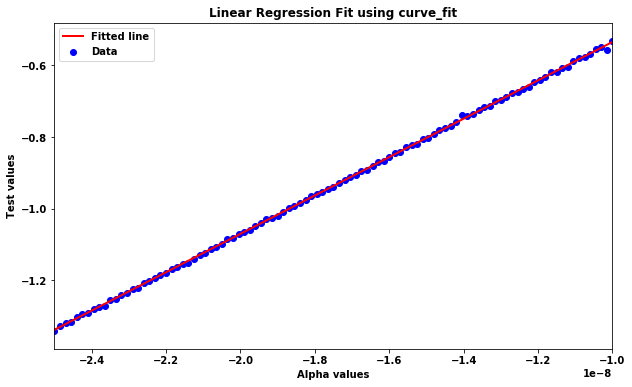

Slope: 53568148.123704955
Intercept: 0.0010267937919140602
y= 53568148.123704955x + 0.0010267937919140602
2.052e-08


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the test data
test = np.load("simulations/sim_temp_motion/output/finding_alpha/Phase_ROI_TE_0_20_SE_matching_simulation_copy-Tref_10-T_20_Tref_10-T_20_res_0.001_rad_0.03_bc_script_widening_gaussian_1_bc_time_0.000000e+00_rectangle_alpha_(-2.5e-08_-1e-08).npy")

# Define alpha values
alpha_start = -2.5e-8
alpha_end = -1e-8
alpha_step = 101
alpha_values = np.linspace(alpha_start, alpha_end, alpha_step)

# Define the linear function for curve fitting
def linear_func(x, a, b):
    return a * x + b

# Perform the curve fitting
params, covariance = curve_fit(linear_func, alpha_values, test)

# Extract the slope and intercept
slope = params[0]
intercept = params[1]

# Predict values using the fitted parameters
test_pred = linear_func(alpha_values, slope, intercept)

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(alpha_values, test, color='blue', label='Data')
plt.plot(alpha_values, test_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('Alpha values')
plt.ylabel('Test values')
plt.title('Linear Regression Fit using curve_fit')
plt.legend()

# Customize x-axis to show alpha values
# plt.xticks(alpha_values[::10], rotation=45)  # Show every 10th alpha value for better readability

# Set x-axis limits
plt.xlim(alpha_start, alpha_end)

plt.show()

# Print slope and intercept
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"y= {slope}x + {intercept}")
value = (1.1-intercept)/slope
print(f"{value:.3e}")